In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import numpy as np
import random
import time
import pandas as pd
import math
import os

t0=time.time()

def scan(cant,lista):
    i=0
    for x in lista:
        print(x)
        i+=1
        if i>cant:
            break
            
def Tiempo():
    t1=time.time()
    print("Esto tardó {} segundos".format(t1-t0))


def ldata(archive):
        f = open(archive)
        data = []
        for line in f:
            col = line.split("\t")
            col = [x.strip() for x in col]
            data.append(col)
        return data 
    
# Vamos a leer los archivos con esta celda
#--------------------------------------------------------------------------

# 

CarpCheck=[[root,files] for root,dirs,files in os.walk(".")]

# Los primero dos elementos de CarpCheck no les des bola, porque son
# la mismísma carpeta en la que estás y porque el segundo es ipynb checkpoints
# Eso es algo del notebook, no del TP.

Puntos = []

for x in CarpCheck[2:]:
    dada = x[0].split("\\")
    Puntos.append(dada[1])

# Con esto tengo los nombres de todas las carpetas que estoy usando
# Fijate que si cambias las carpetas esto cambia

CarpCheck=[[root,files] for root,dirs,files in os.walk(Puntos[0])]
Labarcns = CarpCheck[0][1]

CarpCheck=[[root,files] for root,dirs,files in os.walk(Puntos[1])]
Labarc1a = CarpCheck[0][1]

CarpCheck=[[root,files] for root,dirs,files in os.walk(Puntos[2])]
Labarc1b = CarpCheck[0][1]

CarpCheck=[[root,files] for root,dirs,files in os.walk(Puntos[3])]
Labarc2 = CarpCheck[0][1]

CarpCheck=[[root,files] for root,dirs,files in os.walk(Puntos[4])]
Labarc3 = CarpCheck[0][1]

# Con esto tengo los nombres de todos los archivos en todas las carpetas

Tiempo()

Esto tardó 0.0500025749206543 segundos


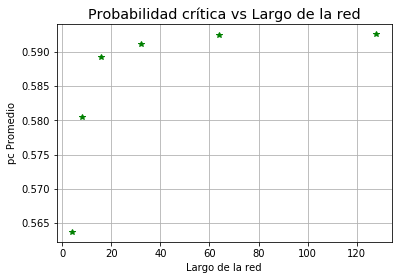

Esto tardó 3.2791876792907715 segundos


In [2]:
t0=time.time()

# Acá ahora sí voy a hacer el punto 1 a

Dim = []

# Los archivos de texto tienen nombre de la forma "Datos_Promediar_p_dimension_dim.txt"
for x in Labarc1a:
    dada = x.split("_") # Esto me separa en los _, me queda al final dim.txt
    dada = dada[len(dada)-1].split(".")
    Dim.append(int(dada[0]))

Dim.sort()

# Con esto me armé una lista con todas las dimensiones utilizadas

Promedios = dict()

for i in range(len(Labarc1a)):
    # Lee el archivo con los valores de pc para cada dimensión
    Datos = ldata("Perc1a/{}".format(Labarc1a[i]))
    # Lo corrige para que Datos sea una lista con los valores de pc
    Datos = Datos[0][0:len(Datos[0])-1]

    # Esto me arma un array para poder promediar
    Arr = np.array([])
    for x in Datos:
        x=float(x)
        Arr = np.append(Arr,x)
        
    Prom = np.mean(Arr)
    
    dada = Labarc1a[i].split("_")
    dada = dada[len(dada)-1].split(".")
    Promedios[int(dada[0])] = Prom
    
# Ya tengo hecho el promedios, que es un diccionario con el pc calculado para cada tamaño de la red

#Hagamos el ploteo

X = []
Y = []

for item in Promedios.items():
    X.append(item[0])
    Y.append(item[1])

plt.plot(X,Y,"g*")
plt.grid()
plt.rcParams.update({'font.size': 12})
plt.xlabel("Largo de la red")
plt.ylabel("pc Promedio")
plt.title("Probabilidad crítica vs Largo de la red")
plt.show()

Tiempo()

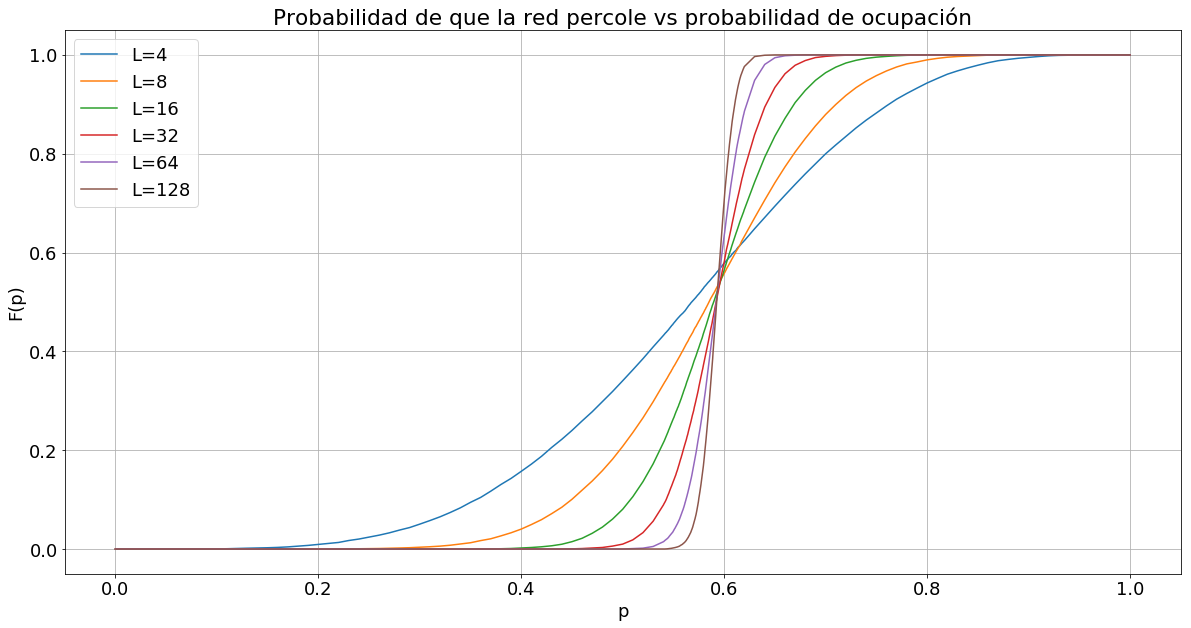

Esto tardó 16.515944719314575 segundos


In [9]:
t0=time.time()

# Hagamos acá el punto 1b

# Para empezar, el Labarc1b tiene todos los archivos mezclados. Es decir, pone el p=0
# para todas las dimensiones, después el p=0.1 para todas, y así. Habrá que flitrarlos para tomar
# los que yo quiero tomar

Dim = []

# Los archivos de texto tienen nombre de la forma "Datos_Fp_p=prob_dimension_dim.txt"
for x in Labarc1b:
    dada = x.split("_") # Esto me separa en los _, me queda al final dim.txt
    dada = dada[len(dada)-1].split(".")
    if int(dada[0]) not in Dim:
        Dim.append(int(dada[0]))

Dim.sort()

# Archivos de cada Dimensión
ArcDim = dict()

for x in Dim:
    ArcDim[x] = []

# Los archivos de texto tienen nombre de la forma "Datos_Fp_p=prob_dimension_dim.txt"
for x in Labarc1b:
    dada = x.split("_") # Esto me separa en los _
    dudu = dada[len(dada)-1].split(".")
    ArcDim[int(dudu[0])].append(x)

# Hasta acá el programa los está guardando en orden, no hay necesidad de pensar que no lo estuvieran

# Armo un diccionario con datos para plotear

PlotXY = dict()
for x in Dim:
    PlotXY[x] = [[],[]] # De esta manera la primer lista es el X y la segunda lista el Y
        
for dim in Dim:
    for x in ArcDim[dim]:
        # Lee el archivo con 1 y 0 que indican la cantidad de veces que percolo la red para esa probabilidad
        Datos = ldata("Perc1b/{}".format(x))
        # Lo corrige para que Datos sea una lista con los valores de pc
        Datos = Datos[0][0:len(Datos[0])-1]
        yy = Datos.count("1")/len(Datos)
        dada = x.split("_") # Con esto me queda en la posición 2 "p=prob"
        dudu = dada[2].split("=") # Con esto me queda en la posición 1 "prob"
        xx = float(dudu[1])
        PlotXY[dim][0].append(xx)
        PlotXY[dim][1].append(yy)
        
# Ahora tengo que calcular los pc como la mediana. Tengo que interpolar con rectas
Pc = dict()

for dim in Dim:
    if PlotXY[dim][1].count(0.5)>0: # En este caso encontré el 0.5 en la lista
        ind = PlotXY[dim][1].index(0.5)
        Pc[dim] = PlotXY[dim][1][ind]
    else:
        for i in range(50,len(PlotXY[dim][0])): # Empiezo en 50 total sé que antes no está
            if PlotXY[dim][1][i]>0.5:
                m = (PlotXY[dim][1][i]-PlotXY[dim][1][i-1])/(PlotXY[dim][0][i]-PlotXY[dim][0][i-1])
                b = PlotXY[dim][1][i]-m*PlotXY[dim][0][i]
                pc = (0.5-b)/m
                Pc[dim] = pc
                break
            

# Acá hago el plot de la figura. (Quedó re bien) 

plt.figure(figsize=(20,10))
for x in Dim:
    plt.plot(PlotXY[x][0],PlotXY[x][1], label = "L={}".format(x))
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.xlabel("p")
plt.ylabel("F(p)")
plt.title("Probabilidad de que la red percole vs probabilidad de ocupación")
plt.legend()
plt.show()

# Bien, ahí tengo el plot y las pc. Tengo todo

Tiempo()

In [5]:
t0=time.time()
# Hagamos acá el punto 1c
# Necesito calcular la dispersión de cada punto

Disperscorr = dict() # Esto es la dispersión del punto a
Dispersprom = dict() # Esto es la dispersión del punto b



for dim in Dim:
    # Esta parte es la que me calcula la dispersión para los datos del 1a
    for x in Labarc1a:
        dada = x.split("_")
        dudu = dada[len(dada)-1].split(".")
        if int(dudu[0])==dim:
            # Lee el archivo con los valores de pc para cada dimensión
            Datos = ldata("Perc1a/{}".format(x))
            # Lo corrige para que Datos sea una lista con los valores de pc
            Datos = Datos[0][0:len(Datos[0])-1]
            # Ahora calculo la dispersión
            resul = 0
            for p in Datos:
                resul = resul + (float(p)-Promedios[dim])**2
            dis = math.sqrt((1/len(Datos))*resul)
            Disperscorr[dim] = dis
            break
    # Esta parte es la que me calcula la dispersión para los datos del 1b
    P1b = []
    for a in ArcDim[dim]:
        # Lee el archivo con los valores de pc para cada dimensión
        Datos = ldata("Perc1b/{}".format(a))
        # Lo corrige para que Datos sea una lista con los valores de pc
        Datos = Datos[0][0:len(Datos[0])-1]
        # Ahora calculo la dispersión
        yy = Datos.count("1")/len(Datos)
        P1b.append(yy)
    resul = 0
    for l in P1b:
        resul = resul + (l-Pc[dim])**2
    dis = math.sqrt((1/len(Datos))*resul)
    Dispersprom[dim] = dis

Tiempo()

Esto tardó 28.78464651107788 segundos


In [11]:
t0=time.time()

# Hagamos acá el punto 1d
# Para este punto tengo que usar los datos de los ejercicios anteriores para justificar
# el intervalo que voy a usar para calcular el Tau



Dimprob = dict() #Este es un diccionario que contiene diccionarios cuyas claves son probabilidades
 
for dim in Dim:
    # Los archivos tienen la forma "Datos_ns_L=dim.txt"
    for x in Labarcns:
        dada = x.split("=") # En el último está el dim.txt
        dede = dada[len(dada)-1].split(".") # En el primero está el dim
        if int(dede[0])==dim:
            label = x
    # Lee el archivo con los valores de pc para cada dimensión
    Datos = ldata("NS/{}".format(label))
    # Fijate en los datos que nunca dividí por el tamaño de la red, sólo promedié las 30000
    # mediciones que realicé
    # Armemos un pandas. Para eso, primero necesito un diccionario que le voy a pasar
    Ddatos = dict()
    Ddatos[Datos[0][0]] = []
    for x in range(1,len(Datos)-1):
        Ddatos[Datos[0][0]].append(float(Datos[x][0]))
    n=0
    for i in Datos[0][1:len(Datos[0])-1]:
        n += 1
        Ddatos[i] = []
        for j in range(1,len(Datos)-1): 
            # A este y el anterior les pongo len(Datos)-1 para que no tome el último que está vacío
            Ddatos[i].append(float(Datos[j][n])/(dim**2)) # Ahora divido por el tamaño de la red
            # Acá 64 es el largo de la red. Si uso otra red, cambiarlo
    Tdatos = pd.DataFrame(Ddatos)
    # Ya me armé mi tabla de Pandas dataframe. Genial
    # Necesito ahora mis intervalos de búsqueda
    # Fijate que esto por ejemplo te tira todas las probabilidades que están entre 0.57 y 0.59
    # Además es un elemento iterable. Si no le ponés prob, te da todas las columnas cuyas filas
    # cumplen lo pedido
    # for x in Tdatos.loc[(0.57<Tdatos["prob"]) & (Tdatos["prob"]<0.59),"prob"]:
    #     print(x)
    ##########################################
    # Para la región de búsqueda voy a usar dos veces la desviación estándar
    # Para cada dimensión tengo dos pc, y dos desviaciones estándar, así que voy a calcular 12 Tau totales
    ProbXYcorr = dict()
    ProbXYprom = dict()
    #Este es un diccionario cuyas claves son probabilidades y me dan los X e Y para plotear
    #---------------------------------------------------------------------------------
    # Es una lista que tiene dos listas con dos listas adentro cada una. La primera es para los
    # datos obtenidos con correciones a la probabilidad, la segunda es para los pc calculados con
    # el barrido
    # Empiezo con la parte hecha por correciones
    inf = Promedios[dim]-0.4*Disperscorr[dim]
    sup = Promedios[dim]+0.4*Disperscorr[dim]
    Info = Tdatos.loc[(inf<=Tdatos["prob"]) & (Tdatos["prob"]<=sup)]
    # En la primer columna están las probabilidades.
    # Para sacar la cantidad de columnas podés usar Info.keys()
    for i in range(len(Info.loc[::,"prob"])):
        ProbXYcorr[Info.iloc[i,0]] = [[],[]]
    for sa in Info.keys()[5::]: # Estoy yendo de 5 hasta (L^2)/2. me parece una región razonable
        Info2 = Info.loc[Info[sa]>0,["prob",sa]]
        for j in range(len(Info2)):
            ProbXYcorr[Info2.iloc[j,0]][0].append(math.log10(int(sa.strip("s"))))
            ProbXYcorr[Info2.iloc[j,0]][1].append(math.log10(Info2.iloc[j,1]))
    # Con eso en la coordenada cero tengo los s y en la coordenada 1 tengo los ns
    #------------------------------------------------------------------------------
    # Ahora hagamos los valores para los pc del punto b
    inf = Pc[dim]-0.4*Dispersprom[dim]
    sup = Pc[dim]+0.4*Dispersprom[dim]
    Info = Tdatos.loc[(inf<=Tdatos["prob"]) & (Tdatos["prob"]<=sup)]
    for i in range(len(Info.loc[::,"prob"])):
        ProbXYprom[Info.iloc[i,0]] = [[],[]]
    for sa in Info.keys()[5::]: # Estoy yendo de 5 hasta (L^2)/2. me parece una región razonable
        Info2 = Info.loc[Info[sa]>0,["prob",sa]]
        for j in range(len(Info2)):
            ProbXYprom[Info2.iloc[j,0]][0].append(math.log10(int(sa.strip("s"))))
            ProbXYprom[Info2.iloc[j,0]][1].append(math.log10(Info2.iloc[j,1]))
    Dimprob[dim] = [ProbXYcorr,ProbXYprom]
    
#--------------------------------------------------------------------------------------------
# Parte 2 del punto d

# Continuación del punto 1d
# Para este punto tengo armados los diccionarios con las listas de los valores que voy a usar
# para plotear. Lo que necesito ahora es hacerle cuadrados mínimos a mis distribuciones,
# de esa manera hallar un pc adecuado, y de ahí obtener el Tau

fitfunc = lambda p,x: -p[0]*x+p[1] # El p[0] es el Tau, el p[1] es el q
# Empecemos con los pc del punto 1a
TauR = np.arange(1.5,6,0.01)

DP = dict() # Otra vez, un dict que recibe dimensiones y lleva a dicts de probabilidades

for dim in Dim:
    PXYcorr = dict()
    PXYprom = dict()
    for p in Dimprob[dim][0].keys():
        X = []
        Y = []
        # Voy a hacer una extrapolación del primer punto con el segundo y del primero con el tercero
        # y así hasta el quinto para promediar q0
        Promord = []
        for j in range(2,min(6,len(Dimprob[dim][0][p][1]))):
            m = (Dimprob[dim][0][p][1][j]-Dimprob[dim][0][p][1][0])/(Dimprob[dim][0][p][0][j]-Dimprob[dim][0][p][0][0])
            b = m*Dimprob[dim][0][p][0][0]-Dimprob[dim][0][p][1][0]
            Promord.append(b)
        Promord = np.array(Promord)
        q0 = np.mean(Promord)
        for Tau in TauR:
            p0 = [Tau,q0]
            Diferencias = Dimprob[dim][0][p][1]-fitfunc(p0,np.array(Dimprob[dim][0][p][0]))
            Cuad = (np.linalg.norm(Diferencias))**2
            X.append(Tau)
            Y.append(Cuad)
            # Con esto me puedo graficar el Chi cuadrado en función del Tau y hallar el mínimo después
        PXYcorr[p] = [X,Y]
        # Ahora hagamos todo los mismo, pero para los casos del punto 1b
        #---------------------------------------------------------------------------------------------
    for p in Dimprob[dim][1].keys():
        X = []
        Y = []
        # Voy a hacer una extrapolación del primer punto con el segundo y del primero con el tercero
        # y así hasta el quinto para promediar q0
        Promord = []
        for j in range(2,min(6,len(Dimprob[dim][1][p][1]))):
            m = (Dimprob[dim][1][p][1][j]-Dimprob[dim][1][p][1][0])/(Dimprob[dim][1][p][0][j]-Dimprob[dim][1][p][0][0])
            b = m*Dimprob[dim][1][p][0][0]-Dimprob[dim][1][p][1][0]
            Promord.append(b)
        Promord = np.array(Promord)
        q0 = np.mean(Promord)
        for Tau in TauR:
            p0 = [Tau,q0]
            Diferencias = Dimprob[dim][1][p][1]-fitfunc(p0,np.array(Dimprob[dim][1][p][0]))
            Cuad = (np.linalg.norm(Diferencias))**2
            X.append(Tau)
            Y.append(Cuad)
            # Con esto me puedo graficar el Chi cuadrado en función del Tau y hallar el mínimo después
        PXYprom[p] = [X,Y]
    DP[dim] = [PXYcorr,PXYprom]
            
# Bien, ya tengo el diccionario con diccionarios con listas de los valores de Chi^2 vs Tau.
# No los graficaría porque esos son muchísimos gráficos, pero lo que debería hacer, y lo que parece
# Más razonable, es tomar mínimos para hallar el Tau correspondiente en cada probabilidad, y luego
# Buscar el mínimo Tau entre todas las probabilidades. De esa manera, tendré el Tau y la probabilidad
# Asociada a ese Tau. Todo eso para cada dimensión.

#----------------------------------------------------------------------------------------------------
# Parte final del punto d

# Ahora voy a comparar todos los valores hallados 
# y hallar el Tau que minimiza entre todas las probabilidades

DTauc = dict()
DTaup = dict()

for dim in Dim:
    # Hagamos primer la parte de las correcciónes, es decir, punto 1a
    Taus = []
    Chi = []
    Probas = []
    for p in DP[dim][0].keys():
        chimin = min(DP[dim][0][p][1])
        taumin = DP[dim][0][p][0][DP[dim][0][p][1].index(chimin)]
        Taus.append(taumin)
        Chi.append(chimin)
        Probas.append(p)
    DTauc[dim] = [Taus,Chi,Probas]
    # Ahora falta para el caso de los promedios, es decir, el punto b
    #----------------------------------------------------------------
    Taus = []
    Chi = []
    Probas = []
    for p in DP[dim][1].keys():
        chimin = min(DP[dim][1][p][1])
        taumin = DP[dim][1][p][0][DP[dim][1][p][1].index(chimin)]
        Taus.append(taumin)
        Chi.append(chimin)
        Probas.append(p)
    DTaup[dim] = [Taus,Chi,Probas]

# Una vez que tengo los dos diccionarios de Tau, hallar el Tau con la probabilidad donde minimiza
# es una boludez. Podría poner el gráfico de Chi vs Tau para alguna dimensión y la probabilidad
# hallada con esto

Taufinalc = dict()
Taufinalp = dict()

for dim in Dim:
    chimin = min(DTauc[dim][1])
    indice = DTauc[dim][1].index(chimin)
    Taufinalc[dim] = [DTauc[dim][0][indice],DTauc[dim][1][indice],DTauc[dim][2][indice]]
    # Esto me deja en cada dimensión una lista con el Tau,
    # el chi cuadrado y la probabilidad correspondiente. En ese orden
    chimin = min(DTaup[dim][1])
    indice = DTaup[dim][1].index(chimin)
    Taufinalp[dim] = [DTaup[dim][0][indice],DTaup[dim][1][indice],DTaup[dim][2][indice]]

# Bien, ahí está todo hecho. Vamor a meterlo todo en una única celda, total, todo junto no tarda
# más de tres minutos y medio. Quizás cuando sume el de 128 pase a ser cinco segundos, pero no sería
# tan terrible. Lo que no revise es cómo son las rectas de ajuste. Pero teniendo el Tau, pudiendo sacar
# El q0 como lo hice antes, se puede ver la recta fácilmente

Tiempo()

Esto tardó 806.7771451473236 segundos


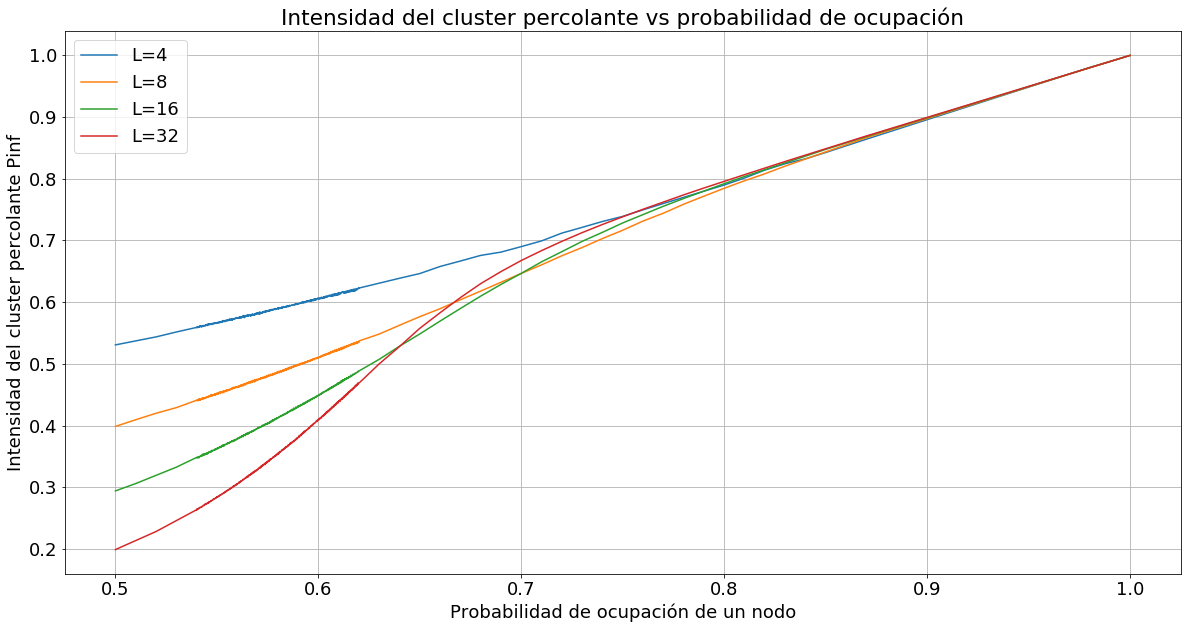

Esto tardó 72.92717123031616 segundos


In [14]:
t0=time.time()
# Acá hagamos el punto 2

# Al igual que el punto 1b, en este los archivos también están todos mezclados
# Vamos a hacer lo mismo de armar un diccionario con los archivo correspondientes a cada tamaño

Dim = []

# Los archivos de texto tienen nombre de la forma "Datos_Pinf_p=prob_dimension_dim.txt"
for x in Labarc2:
    dada = x.split("_") # Esto me separa en los _, me queda al final dim.txt
    dada = dada[len(dada)-1].split(".")
    if int(dada[0]) not in Dim:
        Dim.append(int(dada[0]))

Dim.sort()

# Archivos de cada Dimensión
ArcDim = dict()

for x in Dim:
    ArcDim[x] = []
    
for x in Labarc2:
    dada = x.split("_") # Esto me separa en los _
    dudu = dada[len(dada)-1].split(".")
    ArcDim[int(dudu[0])].append(x)

# Hasta acá el programa los está guardando en orden, no hay necesidad de pensar que no lo estuvieran

PlotXY = dict()

for dim in Dim:
    PlotXY[dim] = [[],[]]
    for x in ArcDim[dim]:
        # Lee el archivo con el tamaño de los clusters percolantes en cada ubicación 
        Datos = ldata("Perc2/{}".format(x))
        # Lo corrige para que Datos sea una lista con los valores de pc
        Datos = Datos[0][0:len(Datos[0])-1]
        for i in range(len(Datos)):
            Datos[i] = float(Datos[i])
        A = np.array(Datos)
        yy = np.mean(A)/(dim**2)
        dada = x.split("_") # Con esto me queda en la posición 2 "p=prob"
        dudu = dada[2].split("=") # Con esto me queda en la posición 1 "prob"
        xx = float(dudu[1])
        PlotXY[dim][0].append(xx)
        PlotXY[dim][1].append(yy)

# Acá hago el plot de la figura. (Quedó re bien) 

plt.figure(figsize=(20,10))
for x in Dim:
    plt.plot(PlotXY[x][0],PlotXY[x][1], label = "L={}".format(x))
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.xlabel("Probabilidad de ocupación de un nodo")
plt.ylabel("Intensidad del cluster percolante Pinf")
plt.title("Intensidad del cluster percolante vs probabilidad de ocupación")
plt.legend()
plt.show()

Tiempo()

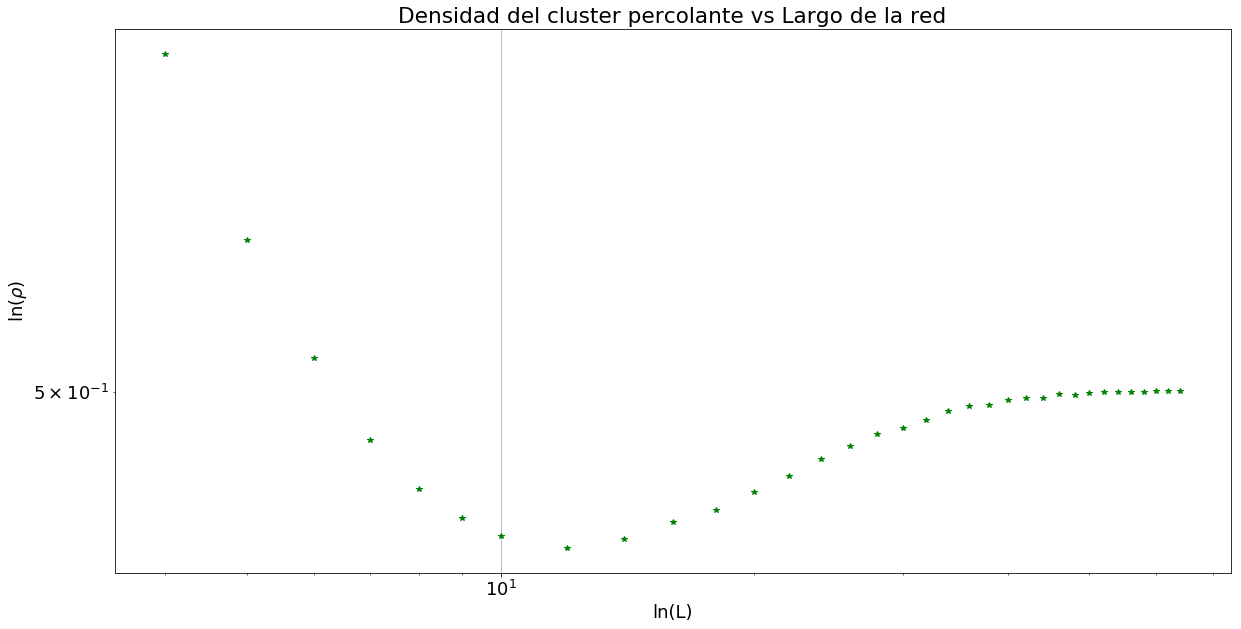

Esto tardó 0.7580432891845703 segundos


In [18]:
t0=time.time()
# Acá hagamos el punto 3

X = []
Y = []

for x in Labarc3:
    # Lee el archivo con los valores de pc para cada dimensión
    # Los archivos tienen la forma "Datos_M_dim=dim.txt" El segundo dim es el número
    Datos = ldata("Perc3/{}".format(x))
    # Lo corrige para que Datos sea una lista con los valores de pc
    Datos = Datos[0][0:len(Datos[0])-1]
    for i in range(len(Datos)):
        Datos[i] = int(Datos[i])
    Datos = np.array(Datos)
    dada = x.split("=") # En el último término me queda dim.txt
    dede = dada[len(dada)-1].split(".") # En la primer coordenada me queda el dim
    dim = int(dede[0])
    Densidad = np.mean(Datos)/(dim*dim)
    X.append(dim)
    Y.append(Densidad)
    
plt.figure(figsize=(20,10))
plt.loglog(X,Y,"g*")
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.xlabel("ln(L)")
plt.ylabel("ln($\\rho$)")
plt.title("Densidad del cluster percolante vs Largo de la red")
plt.show()


Tiempo()

In [ ]:
t0=time.time()

# Acá hagamos el punto 4
# Lo que quiero acá es hallar el gráfico de la función f(z) en función de s para distintos p




Tiempo()

In [13]:
# print(Disperscorr)
# print(Promedios)
# print(Dispersprom)
# print(Pc)

print(Taufinalc)
print(Taufinalp)

{4: [4.430000000000002, 1.7506749796082297, 0.6197], 8: [3.9300000000000024, 7.410466631985144, 0.5684], 16: [3.5100000000000016, 35.529890548347154, 0.564], 32: [3.2000000000000015, 119.47292600393526, 0.5761], 64: [2.990000000000001, 354.6151196071257, 0.5833], 128: [2.840000000000001, 1119.20792108932, 0.587]}
{4: [4.060000000000002, 3.207295373070325, 0.5599], 8: [3.940000000000002, 7.5843627955621065, 0.5714], 16: [3.5000000000000018, 37.03689825258077, 0.572], 32: [3.2100000000000017, 108.29985811939977, 0.5689], 64: [3.030000000000001, 222.2073162719496, 0.564], 128: [2.9600000000000013, 326.01985677664607, 0.5603]}
